<a href="https://colab.research.google.com/github/aaleksandraristic/GA-s-Stock-Prediction-/blob/main/GAs_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Load stock price data (assuming you have a CSV file with columns 'Date' and 'Price')
data = pd.read_csv('final_dataset.csv')

In [ ]:
# Extract the 'Price' column as the feature for clustering
prices = data['APPL'].values.reshape(-1, 1)

In [ ]:
# Choose the number of clusters (K)
k = 8

In [ ]:
# Create and fit the K-means model
kmeans = KMeans(n_clusters=k)
kmeans.fit(prices)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

In [ ]:
# Add cluster labels to the original DataFrame
data['Cluster'] = cluster_labels

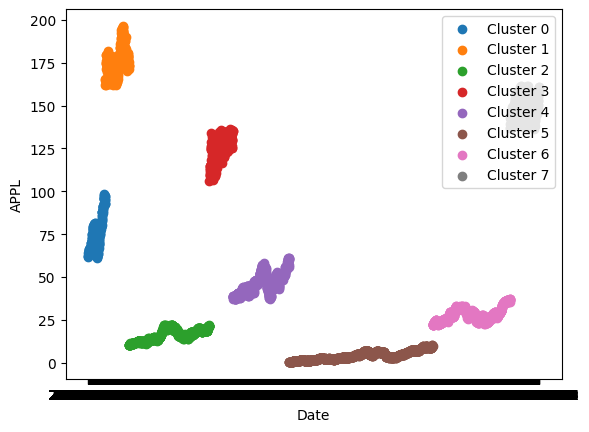

In [ ]:
# Visualize the clusters
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Date'], cluster_data['APPL'], marker='o', label=f'Cluster {i}')

plt.xlabel('Date')
plt.ylabel('APPL')
plt.legend(loc='upper right')
plt.show()

# New Version - Improvements

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

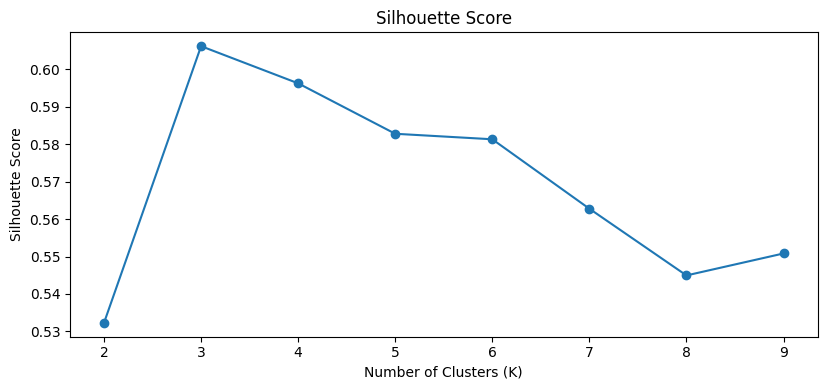

Silhouette score: [0.5322845820190515, 0.6061590826151364, 0.5962377056711251, 0.5827733559639903, 0.5813030377171459, 0.5627645210199671, 0.5449542867228838, 0.5508188640902977]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load stock price data
data = pd.read_csv('final_dataset.csv')

# Extract the 'Price' column as the feature for clustering
prices = data['IBM'].values.reshape(-1, 1)

# Choose a range of potential values for K (number of clusters)
k_values = range(2, 10)  # Adjust the range as needed
inertia = []  # Sum of squared distances from data points to the centroids
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(prices)

    # Calculate the sum of squared distances (inertia) for the current K
    inertia.append(kmeans.inertia_)

    # Calculate the silhouette score for the current K
    score = silhouette_score(prices, kmeans.labels_)
    silhouette_scores.append(score)

# Silhouette Score
# The Silhouette Score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
# It quantifies the quality of clustering, with a higher Silhouette Score indicating that the object is well matched to its own cluster and poorly matched to neighboring clusters.
# We need to select the number of clusters (K) that maximizes the Silhouette Score

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

print('Silhouette score:', silhouette_scores)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


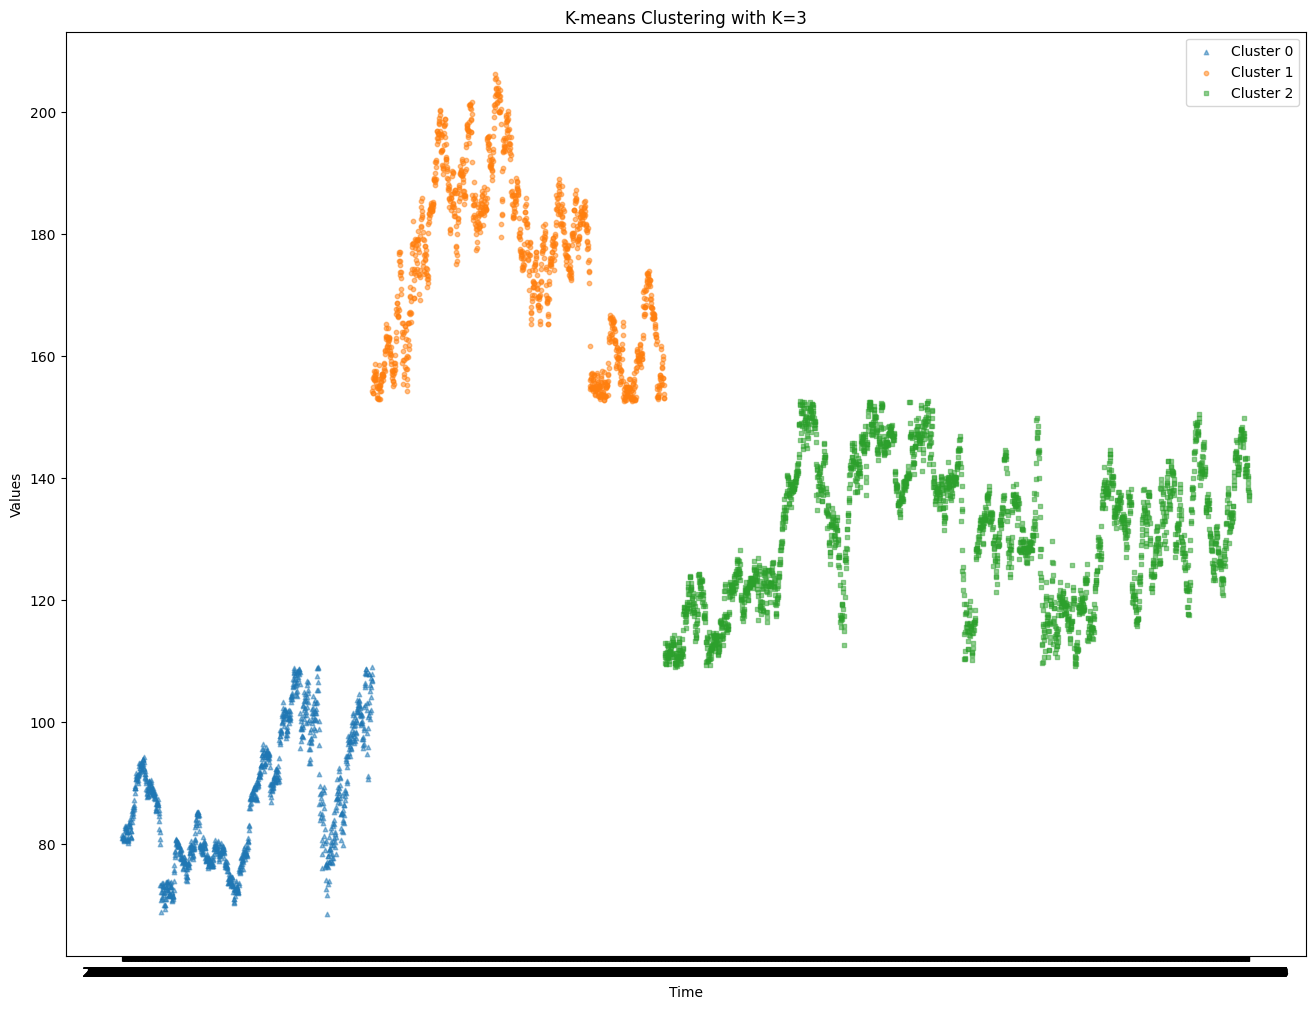

In [ ]:
# Optimal number of clusters (K) based on maximum Silhouette Score
optimal_k = 3

# Create and fit the K-means model with the optimal K
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(prices)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
data['Cluster'] = cluster_labels

# Define different markers for each cluster
markers = ['^', 'o', 's']

plt.figure(figsize=(16, 12))

# Visualize the clusters with different colors
for i in range(optimal_k):
    cluster_data = data[data['Cluster'] == i]
    marker = markers[i % len(markers)]  # Cycle through markers if more clusters
    plt.scatter(cluster_data['Date'], cluster_data['IBM'], marker=marker, s = 10, alpha=0.5, label=f'Cluster {i}')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.title(f'K-means Clustering with K={optimal_k}')
plt.show()
